In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops

/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/atsushi.hara/.anyenv/envs/pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ops.reset_default_graph()

In [3]:
sess = tf.Session()

In [4]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [5]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

b = np.transpose(np.matrix(y_vals))

A_tensor = tf.constant(A)
B_tensor = tf.constant(b)

In [6]:
# Cholesky factorization
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)

tA_b = tf.matmul(tf.transpose(A_tensor), b)
sol1 = tf.matrix_solve(L, tA_b)

sol2 = tf.matrix_solve(tf.transpose(L), sol1)
solution_eval = sess.run(sol2)

In [7]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: {}'.format(slope))
print('y_intercept: {}'.format(y_intercept))

slope: 1.0055897557679192
y_intercept: -0.021399474514662866


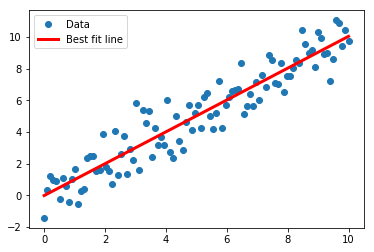

In [8]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i + y_intercept)
    
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()